# Assessing the mean expression and dispersion of T CD4 marker genes

Here I'll check how the marker genes of the new T CD4 subpopulations identified with TopOMetry compare to marker genes from other populations and from marker genes obtained with the default pipeline. For this, I'll first consider the default highly-variable gene (HVG) selection from scanpy that was used in our manuscript.

I'm thankful to Prof. Dmitry Kobak and to his students Jan Lause, Niklas Böhm and Sebastian Damrich for suggesting such analysis and performing an early version of based on pearson residuals. That is a valid approach, so I'll follow it in a second moment in this very notebook, after I show how it can be done using the default scanpy normalization and HVG (that's the approach used in the TopOMetry manuscript). We'll see how the marker genes found with TopOMetry have similar mean expressions and variances/dispersions to those found with the default scanpy pipeline. This speaks against a 'null hypothesis' that the importance of these genes could have been exaggerated by TopOMetry eigendecomposition step.

In a different notebook, I also show how the T CD4 diversity revealed by TopOMetry in scRNAseq data from human blood is present regardless of the method chosen for normalization and HVG selection, but that the composition of the different subtypes is highly dependent on this choice. That was expected, as TopOMetry operates on the input matrix (change it, and the output will most probably also change). Once again, this speaks against the 'null hypothesis' that such diversity could be an analysis artifact.

In [1]:
import numpy as np
import scanpy as sc
import seaborn as sns
from scipy.sparse import csr_matrix

In [2]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
wd = '/home/davi/Bioinfo/TopOMetry_Paper/FinalData/'

## Load the PBMC68k data and get the marker genes from the manuscript

In [5]:
pbmc68k = sc.read_h5ad(wd + 'pbmc68k_paper_final_backup.h5ad')
pbmc68k

AnnData object with n_obs × n_vars = 66834 × 2318
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'db_diff_leiden', 'db_fuzzy_leiden', 'fb_diff_leiden', 'fb_fuzzy_leiden', 'pca_leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'db_diff_leiden_colors', 'db_diff_leiden_dendro', 'db_diff_leiden_logreg', 'db_fuzzy_leiden_colors', 'dendrogram_db_diff_leiden', 'fb_diff_leiden_colors', 'fb_fuzzy_leiden_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'pca_leiden_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_PHATE', 'X_PaCMAP', 'X_TriMAP', 'X_UMAP_on_PCA', 'X_db', 'X_db_NCVis', 'X_db_PaCMAP', 'X_db_TriMAP', 'X_db_UMAP', 'X_db_diff_MAP', 'X_db_diff_MDE', 'X_db_fuzzy_MAP', 'X_db_fuzzy_MDE', 'X_db_tSNE', 'X_fb', 'X_fb_NCVis', 'X_fb_PaCMAP', 'X_fb_TriMAP', 'X_fb_diff_MA

In [6]:
sc.tl.rank_genes_groups(pbmc68k, groupby='db_diff_leiden', n_genes=pbmc68k.raw.to_adata().shape[1], method='t-test_overestim_var', key_added='db_diff_t_test_overestim_var')
sc.tl.rank_genes_groups(pbmc68k, groupby='pca_leiden', n_genes=pbmc68k.raw.to_adata().shape[1], method='t-test_overestim_var', key_added='pca_leiden_t_test_overestim_var')

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is 

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals'] = pvals[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:409: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals_adj'] = pvals_adj[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: PerformanceWarning: DataFrame is highly fragmented.  This is usu

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is 

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is 

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is 

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is 

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:409: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals_adj'] = pvals_adj[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals'] = pvals[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:409: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals_adj'] = pvals_adj[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: PerformanceWarning: DataFrame is highly fragmented.  This is usu

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals'] = pvals[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:409: PerformanceWarning: DataFrame is highly fragmented.  This is usually t

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is 

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals'] = pvals[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:409: PerformanceWarning: DataFrame is highly fragmented.  This is usually t

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:409: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals_adj'] = pvals_adj[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is 

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals'] = pvals[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:409: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals_adj'] = pvals_adj[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: PerformanceWarning: DataFrame is highly fragmented.  This is usu

/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/davi/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is 

In [7]:
pca_clusters = []
for i in np.arange(0, 16):
    pca_clusters.append(str(i))

topometry_clusters = []
for i in np.arange(0,126):
    topometry_clusters.append(str(i))

t_cd4_clusters = []
for i in np.arange(0,126):
    t_cd4_clusters.append(str(i))

for not_cd4 in ['0', '1', '2', '3', '77', '83', '123', '125']:  
    t_cd4_clusters.remove(not_cd4)


In [8]:
pbmc68k_raw = pbmc68k.raw.to_adata()

In [9]:
list_of_pca_markers = []
list_of_topometry_markers = []

for pca_cluster in pca_clusters:
    list_of_pca_markers.append(sc.get.rank_genes_groups_df(pbmc68k_raw, group=pca_cluster, 
                                    key='pca_leiden_t_test_overestim_var', log2fc_max=5,
                                    log2fc_min=3, pval_cutoff=1e-8)['names'])  
    # tigher thresholds, otherwise we get many thousands of 'marker genes'

for topometry_cluster in topometry_clusters:
    list_of_topometry_markers.append(sc.get.rank_genes_groups_df(pbmc68k_raw, group=topometry_cluster, 
                                    key='db_diff_t_test_overestim_var', log2fc_max=5,
                                    log2fc_min=3, pval_cutoff=1e-8)['names'])
    # tigher thresholds, otherwise we get >1000 marker genes

list_of_pca_markers = np.concatenate(list_of_pca_markers)
list_of_pca_markers = list_of_pca_markers.tolist()    
    
list_of_topometry_markers = np.concatenate(list_of_topometry_markers)
list_of_topometry_markers = list_of_topometry_markers.tolist()


list_of_cd4_markers = []
for t_cd4_cluster in t_cd4_clusters:
    list_of_cd4_markers.append(sc.get.rank_genes_groups_df(pbmc68k_raw, group=t_cd4_cluster, 
                                    key='db_diff_t_test_overestim_var', log2fc_max=5,
                                    log2fc_min=1, pval_cutoff=0.01)['names'])
    
list_of_cd4_markers = np.concatenate(list_of_cd4_markers)
list_of_cd4_markers = list_of_cd4_markers.tolist()

In [10]:
# markers from pca
pbmc68k_raw.var['pca_markers'] = np.isin(pbmc68k_raw.var_names,list_of_pca_markers)
pbmc68k_pca_markers = pbmc68k_raw[:,pbmc68k_raw.var['pca_markers']]

# markers from topometry
pbmc68k_raw.var['topometry_markers'] = np.isin(pbmc68k_raw.var_names,list_of_topometry_markers)
pbmc68k_topometry_markers = pbmc68k_raw[:,pbmc68k_raw.var['topometry_markers']]

# markers from both
pbmc68k_both_markers = pbmc68k_raw[:,pbmc68k_raw.var['topometry_markers'] & pbmc68k_raw.var['pca_markers']]

# topometry T CD4 markers
pbmc68k_raw.var['cd4_markers'] = np.isin(pbmc68k_raw.var_names,list_of_cd4_markers)
pbmc68k_cd4_markers = pbmc68k_raw[:,pbmc68k_raw.var['cd4_markers']]


# T CD4 markers / HVGs
pbmc68k_hvg = pbmc68k_raw[:,pbmc68k_raw.var['highly_variable'] ]
pbmc68k_hvg_not_topometry_cd4_marker = pbmc68k_raw[:,pbmc68k_raw.var['highly_variable'] & ~pbmc68k_raw.var['cd4_markers']]
pbmc68k_topometry_cd4_marker_not_hvg = pbmc68k_raw[:,pbmc68k_raw.var['cd4_markers'] & ~pbmc68k_raw.var['highly_variable']]
pbmc68k_hvg_and_topometry_cd4_marker = pbmc68k_raw[:,pbmc68k_raw.var['highly_variable'] & pbmc68k_raw.var['cd4_markers']]

### Visualize marker genes' mean and normalized dispersion (Scanpy default)

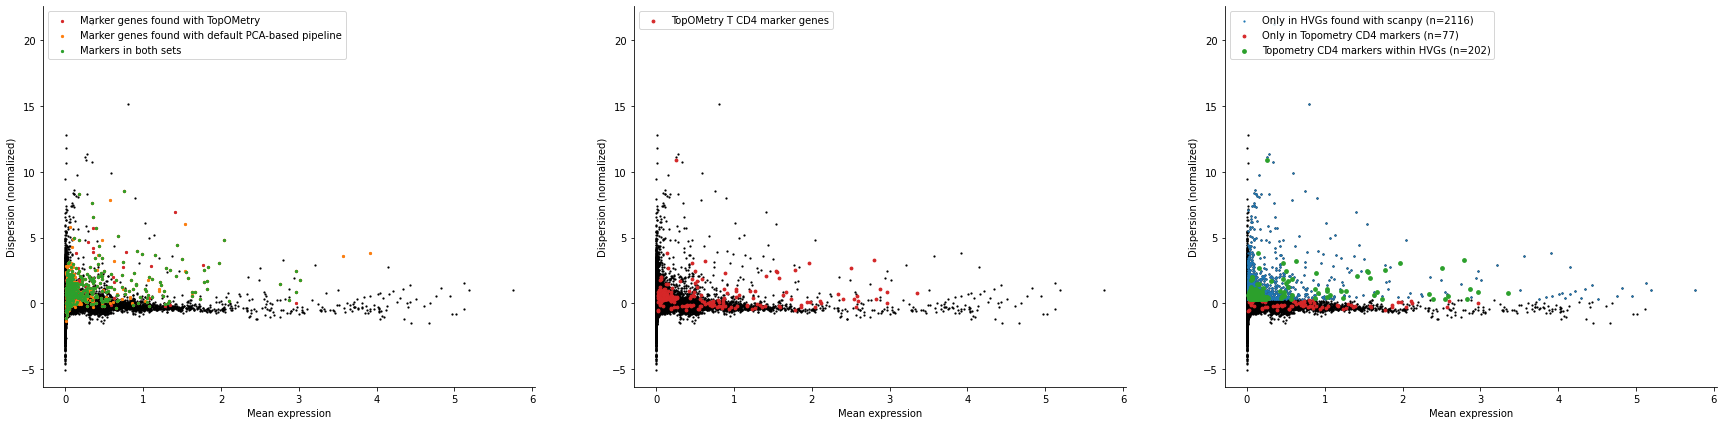

In [11]:
plt.figure(figsize=(30,7))

plt.subplot(131)
plt.scatter(pbmc68k_raw.var['means'],pbmc68k_raw.var['dispersions_norm'],s=5,linewidths=0,c='k')
plt.scatter(pbmc68k_topometry_markers.var['means'],pbmc68k_topometry_markers.var['dispersions_norm'],s=5,linewidths=1,label='Marker genes found with TopOMetry',c='tab:red')
plt.scatter(pbmc68k_pca_markers.var['means'],pbmc68k_pca_markers.var['dispersions_norm'],s=5,linewidths=1,label='Marker genes found with default PCA-based pipeline',c='tab:orange')
plt.scatter(pbmc68k_both_markers.var['means'],pbmc68k_both_markers.var['dispersions_norm'],s=5,linewidths=1,label='Markers in both sets',c='tab:green')
plt.legend(loc='upper left')
plt.xlabel('Mean expression')
plt.ylabel('Dispersion (normalized)')


plt.subplot(132)
plt.scatter(pbmc68k_raw.var['means'],pbmc68k_raw.var['dispersions_norm'],s=5,linewidths=0,c='k')
plt.scatter(pbmc68k_cd4_markers.var['means'],pbmc68k_cd4_markers.var['dispersions_norm'],s=8,linewidths=1,label='TopOMetry T CD4 marker genes',c='tab:red')
plt.legend(loc='upper left')
plt.xlabel('Mean expression')
plt.ylabel('Dispersion (normalized)')

plt.subplot(133)
plt.scatter(pbmc68k_raw.var['means'],pbmc68k_raw.var['dispersions_norm'],s=5,linewidths=0,c='k')
plt.scatter(pbmc68k_hvg_not_topometry_cd4_marker.var['means'],pbmc68k_hvg_not_topometry_cd4_marker.var['dispersions_norm'],s=5,linewidths=0,label=f'Only in HVGs found with scanpy (n={pbmc68k_hvg_not_topometry_cd4_marker.shape[1]})',c='tab:blue')
plt.scatter(pbmc68k_topometry_cd4_marker_not_hvg.var['means'],pbmc68k_topometry_cd4_marker_not_hvg.var['dispersions_norm'],s=8,linewidths=1,label=f'Only in Topometry CD4 markers (n={pbmc68k_topometry_cd4_marker_not_hvg.shape[1]})',c='tab:red')
plt.scatter(pbmc68k_hvg_and_topometry_cd4_marker.var['means'],pbmc68k_hvg_and_topometry_cd4_marker.var['dispersions_norm'],s=8,linewidths=2,label=f'Topometry CD4 markers within HVGs (n={pbmc68k_hvg_and_topometry_cd4_marker.shape[1]})',c='tab:green')
plt.legend(loc='upper left')
plt.xlabel('Mean expression')
plt.ylabel('Dispersion (normalized)')


sns.despine()

As we can see, T CD4 marker genes are not partircularly different from other marker genes when it comes to mean expression and dispersion, and most of them are present in the highly variable genes that were used for TopOMetry computations in the first place. Thus, these genes cannot be attributed to be random noise, nor artifacts overvalued by the eigendecomposition.

### Visualize marker genes' mean and Pearson residuals (Lause _et al_., 2021)

Now we'll use Pearson residuals to make the same comparison. This method was first proposed to single-cell RNA-seq data by Hafemeister and Satija ([Genome Biol, 2019](https://doi.org/10.1186/s13059-019-1874-1)), and was further investigated and refined by Lause, Berens and Kobak ([Genome Biol, 2021](https://doi.org/10.1186/s13059-021-02451-7)). 

For this analysis, I'll follow a recent [tutorial](https://scanpy-tutorials.readthedocs.io/en/latest/tutorial_pearson_residuals.html) on how to this approach with Scanpy. We'll need to re-download the raw data and apply the same quality-control filtering used in the TopOMetry manuscript so that we can use the unnormalized gene expression for each gene. Finally, we'll compare this with the marker genes obtained using the default scanpy pipeline and with TopOMetry.

In [12]:
# Download the data if you haven't yet ---- NOTE: I'm saving this at a different folder
#!mkdir data
#!wget https://cf.10xgenomics.com/samples/cell-exp/1.1.0/fresh_68k_pbmc_donor_a/fresh_68k_pbmc_donor_a_filtered_gene_bc_matrices.tar.gz -O data/fresh_68k_pbmc_donor_a_filtered_gene_bc_matrices.tar.gz
#!cd data; tar -xzf fresh_68k_pbmc_donor_a_filtered_gene_bc_matrices.tar.gz

In [13]:
# I'll read the raw data as `adata`, the processed and analyzed data object is `pbmc68k`

# Set this to the folder where you downloaded the data in the above cell
wd_data = '/home/davi/Bioinfo/TopOMetry_Paper/pbmc68k/'

# Read it
adata = sc.read_10x_mtx(wd_data + 
    'data/filtered_matrices_mex/hg19/',  
    var_names='gene_symbols',               
    cache=True)          
adata.var_names_make_unique()
adata                    

AnnData object with n_obs × n_vars = 68579 × 32738
    var: 'gene_ids'

Perform quality-control filtering:

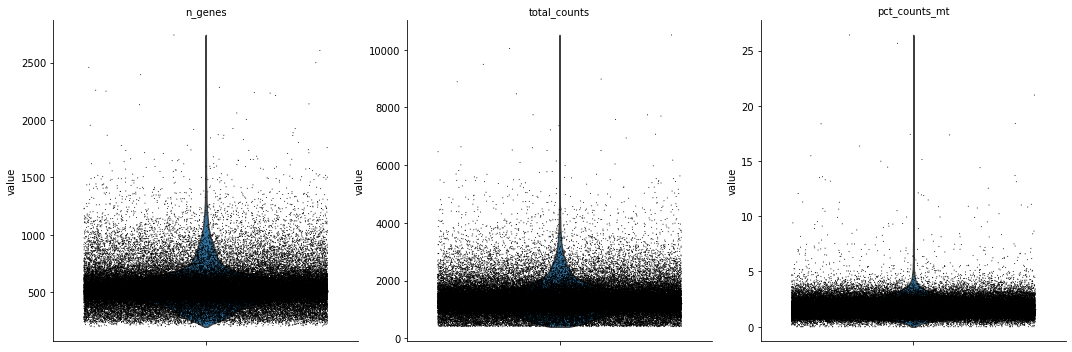

View of AnnData object with n_obs × n_vars = 66834 × 17788
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [14]:
# Default QC
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

# QC thesholds used in the TopOMetry manuscript
adata = adata[adata.obs.n_genes < 1000, :]
adata = adata[adata.obs.total_counts < 4000, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]
adata

Great! As we can see, the `adata` AnnData object has the same number of cells and genes as our `pbmc68k` object:

In [15]:
pbmc68k_raw

AnnData object with n_obs × n_vars = 66834 × 17788
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'db_diff_leiden', 'db_fuzzy_leiden', 'fb_diff_leiden', 'fb_fuzzy_leiden', 'pca_leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'pca_markers', 'topometry_markers', 'cd4_markers'
    uns: 'db_diff_leiden_colors', 'db_diff_leiden_dendro', 'db_diff_leiden_logreg', 'db_fuzzy_leiden_colors', 'dendrogram_db_diff_leiden', 'fb_diff_leiden_colors', 'fb_fuzzy_leiden_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'pca_leiden_colors', 'rank_genes_groups', 'umap', 'db_diff_t_test_overestim_var', 'pca_leiden_t_test_overestim_var'
    obsm: 'X_PHATE', 'X_PaCMAP', 'X_TriMAP', 'X_UMAP_on_PCA', 'X_db', 'X_db_NCVis', 'X_db_PaCMAP', 'X_db_TriMAP', 'X_db_UMAP', 'X_db_diff_MAP', 'X_db_diff_MDE', 'X_db_fuzz

Finally, let's find the HVG's using Pearson residuals. I'll use the number of genes selected by the deafult scanpy workflow as the `n_top_genes` hyperparameter:

In [16]:
sc.experimental.pp.highly_variable_genes(adata, flavor="pearson_residuals", n_top_genes=pbmc68k.n_vars)

/home/davi/.local/lib/python3.9/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:67: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


The pearson residuals are now stored in our `adata` object:

In [17]:
adata

AnnData object with n_obs × n_vars = 66834 × 17788
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable'
    uns: 'hvg'

Now let's subset our marker genes and visualize our results:

In [18]:
# markers from pca
adata.var['pca_markers'] = np.isin(adata.var_names,list_of_pca_markers)
adata_pca_markers = adata[:,adata.var['pca_markers']]

# markers from topometry
adata.var['topometry_markers'] = np.isin(adata.var_names,list_of_topometry_markers)
adata_topometry_markers = adata[:,adata.var['topometry_markers']]

# markers from both
adata_both_markers = adata[:,adata.var['topometry_markers'] & adata.var['pca_markers']]

# topometry T CD4 markers
adata.var['cd4_markers'] = np.isin(adata.var_names,list_of_cd4_markers)
adata_cd4_markers = adata[:,adata.var['cd4_markers']]


# T CD4 markers / HVGs
adata_hvg = adata[:,adata.var['highly_variable'] ]
adata_hvg_not_topometry_cd4_marker = adata[:,adata.var['highly_variable'] & ~adata.var['cd4_markers']]
adata_topometry_cd4_marker_not_hvg = adata[:,adata.var['cd4_markers'] & ~adata.var['highly_variable']]
adata_hvg_and_topometry_cd4_marker = adata[:,adata.var['highly_variable'] & adata.var['cd4_markers']]

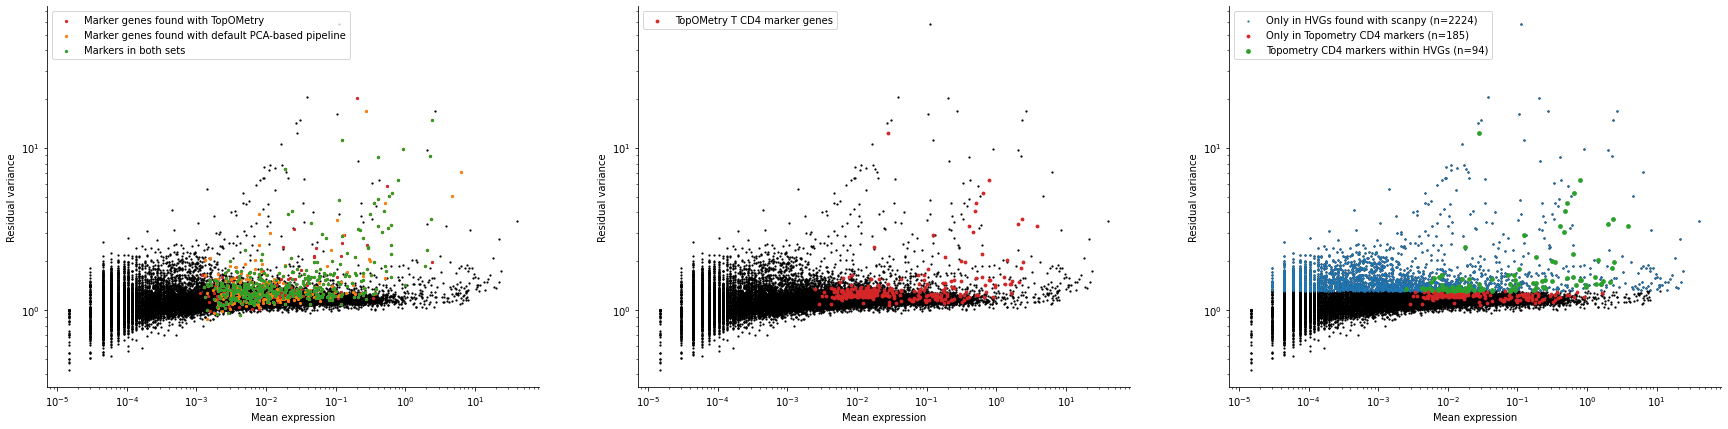

In [19]:
plt.figure(figsize=(30,7))

plt.subplot(131)
plt.scatter(adata.var['means'],adata.var['residual_variances'],s=5,linewidths=0,c='k')
plt.scatter(adata_topometry_markers.var['means'],adata_topometry_markers.var['residual_variances'],s=5,linewidths=1,label='Marker genes found with TopOMetry',c='tab:red')
plt.scatter(adata_pca_markers.var['means'],adata_pca_markers.var['residual_variances'],s=5,linewidths=1,label='Marker genes found with default PCA-based pipeline',c='tab:orange')
plt.scatter(adata_both_markers.var['means'],adata_both_markers.var['residual_variances'],s=5,linewidths=1,label='Markers in both sets',c='tab:green')
plt.legend(loc='upper left')
plt.xscale('log')
plt.xlabel('Mean expression')
plt.yscale('log')
plt.ylabel('Residual variance')


plt.subplot(132)
plt.scatter(adata.var['means'],adata.var['residual_variances'],s=5,linewidths=0,c='k')
plt.scatter(adata_cd4_markers.var['means'],adata_cd4_markers.var['residual_variances'],s=8,linewidths=1,label='TopOMetry T CD4 marker genes',c='tab:red')
plt.legend(loc='upper left')
plt.xscale('log')
plt.xlabel('Mean expression')
plt.yscale('log')
plt.ylabel('Residual variance')

plt.subplot(133)
plt.scatter(adata.var['means'],adata.var['residual_variances'],s=5,linewidths=0,c='k')
plt.scatter(adata_hvg_not_topometry_cd4_marker.var['means'],adata_hvg_not_topometry_cd4_marker.var['residual_variances'],s=5,linewidths=0,label=f'Only in HVGs found with scanpy (n={adata_hvg_not_topometry_cd4_marker.shape[1]})',c='tab:blue')
plt.scatter(adata_topometry_cd4_marker_not_hvg.var['means'],adata_topometry_cd4_marker_not_hvg.var['residual_variances'],s=8,linewidths=1,label=f'Only in Topometry CD4 markers (n={adata_topometry_cd4_marker_not_hvg.shape[1]})',c='tab:red')
plt.scatter(adata_hvg_and_topometry_cd4_marker.var['means'],adata_hvg_and_topometry_cd4_marker.var['residual_variances'],s=8,linewidths=2,label=f'Topometry CD4 markers within HVGs (n={adata_hvg_and_topometry_cd4_marker.shape[1]})',c='tab:green')
plt.legend(loc='upper left')
plt.xscale('log')
plt.xlabel('Mean expression')
plt.yscale('log')
plt.ylabel('Residual variance')


sns.despine()

In conclusion: the marker genes found with TopOMetry do *not* significantly differ from those found with the default pipeline _when it comes to variance/dispersion or mean expression_. This speaks against the 'null hypothesis' that the importance of these genes could have been exaggerated by the algorithm, and in favor of its robustness. 